In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [18]:
t_temp=int(np.random.rand(1,1)*255)
print(t_temp)


21


In [3]:
dict = {1:[1,2,3,4,4,31,3,1,3,0], 2:[12131,132131]}
min(dict[1])
for key, value in dict.items():
    print(key)
    print(value)

print(list(dict.keys()))

1
[1, 2, 3, 4, 4, 31, 3, 1, 3, 0]
2
[12131, 132131]
[1, 2]


In [5]:
a= []
for item in dict.values():
    a.append(item)
print(a)

[[1, 2, 3, 4, 4, 31, 3, 1, 3, 0], [12131, 132131]]


In [19]:
t_temp= np.random.randint(0, 256)
print(t_temp)
img21 = cv2.imread('imageQ21.jpg',0)
print(img21>t_temp)

53
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


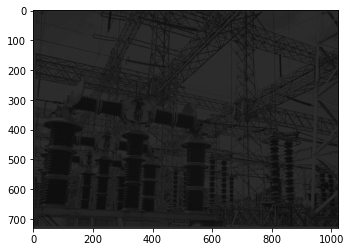

In [2]:
# Question 2

# 2.1 compute histogram 
# read image 2.1
img21 = cv2.imread('imageQ21.jpg',0)
plt.imshow(img21,cmap='gray', vmin=0, vmax=255)
# plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

730 1024
<class 'numpy.ndarray'>


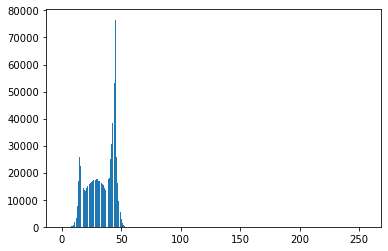

In [6]:
###不使用内置函数的直方图统计
## 方法1
row, column = img21.shape
print(row, column)
gray_level = [0 for x in range(0,256)]
# print(gray_level)

for r in range(row):
    for col in range(column):
        # 逐个像素扫描，并统计
        gray_level[img21[r,col]] +=1
#         print(img21[r,col])
# print(gray_level)
plt.bar(x=range(0,256), height = gray_level)

print(type(img21))


<BarContainer object of 256 artists>

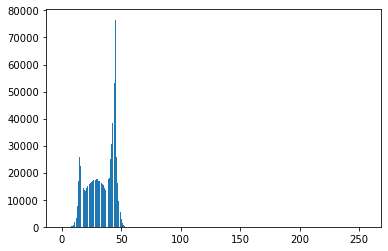

In [13]:
## 方法2: 利用字典统计gray_levels
row, column = img21.shape
dict ={}
for i in range(0,256):
    dict[i]=0
    
temp =[]
for r in range(row):
    for col in range(column):
        temp.append(img21[r,col])
#  print(temp)    
for i in range(0,256):
    for item in temp:
        if i == item:
            dict[i] +=1
# print(dict)
# print(temp)
values = list(dict.values())
plt.bar(x=range(0,256), height = values)

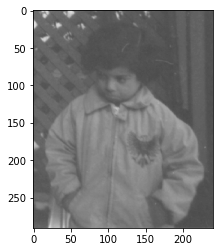

In [17]:
# Question2.2 histogram equalization

img22 = cv2.imread('imageQ22.tif',0)
plt.imshow(img22,cmap='gray', vmin=0, vmax=255)
# plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

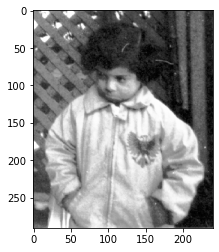

In [25]:

#  opencv 中的直方图均衡化
equ = cv2.equalizeHist(img22)

res= np.hstack((img22,equ)) # stacking images side_by_side
# plt.imshow(res,cmap='gray', vmin=0, vmax=255)
plt.imshow(equ,cmap='gray', vmin=0, vmax=255)


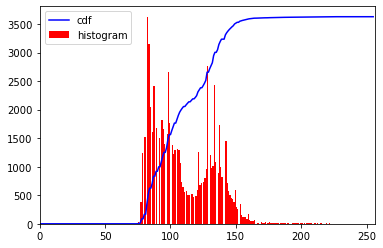

In [29]:
### 使用numpy来进行直方图的均衡化
# Question2.2 histogram equalization

img22 = cv2.imread('imageQ22.tif',0)

# flatten（）将数组变成一维
hist,bins =np.histogram (img22.flatten(),256,[0,256])
# 计算累计直方图
cdf =  hist.cumsum()
# print("cdf", cdf)

cdf_normalized=cdf * hist.max()/cdf.max()

plt.plot(cdf_normalized, color= 'b')
plt.hist(img22.flatten(),256,[0,256], color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()


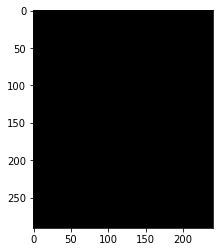

In [36]:
# 构建numpy掩模数组，cdf为原来数组，当数组元素为0的时候，掩盖（计算时被忽略）
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# 对被掩盖的元素赋值，这里赋值为0
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2=cdf[img22]
plt.imshow(img2,cmap='gray', vmin=0, vmax=255)